In [41]:
import pandas as pd
from sklearn.cluster import KMeans,AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from scipy.spatial.distance import cdist,pdist
from sklearn.metrics import silhouette_score,silhouette_samples
import scipy.cluster.hierarchy as hac
import time

# import linkage,complete,ward,single

In [7]:
deg_df = pd.read_csv('C:/JK/Masters Studies/Fall 2017/KDD/Clustering/Dataset/deg.csv')
deg = deg_df.drop("Unnamed: 0",axis=1)
deg1 = deg.drop("Undergraduate.Major",axis=1)
deg1.head()
df_norm = (deg1 - deg1.mean()) / (deg1.max() - deg1.min())
# df_norm['Undergraduate Major']=deg["Undergraduate.Major"]
deg_np = df_norm.as_matrix()
deg_np.itemsize
print(len(deg_np))
# print(df_norm)

50


In [8]:
start_time = time.time()
z = hac.linkage(deg_np, method='ward',metric='euclidean')
print("Time elapsed clustering: "+str(time.time() - start_time))

Time elapsed clustering: 0.0007596015930175781


In [9]:
# col_names = ['Starting.Median.Salary',
#        'Mid.Career.Median.Salary',
#        'Percent.change.from.Starting.to.Mid.Career.Salary',
#        'Mid.Career.10th.Percentile.Salary',
#        'Mid.Career.25th.Percentile.Salary',
#        'Mid.Career.75th.Percentile.Salary',
#        'Mid.Career.90th.Percentile.Salary', 'Undergraduate.Major']

In [10]:
# degDF = pd.DataFrame(deg_np, columns=col_names)

In [11]:
# print(z.shape())
# print(z[:300])
type(z)
z.shape

(49, 4)

In [12]:
undergrad_major_df= pd.DataFrame(deg['Undergraduate.Major'])
print(undergrad_major_df.head())
print(undergrad_major_df.shape)
undergrad_major_array = undergrad_major_df.as_matrix()
# undergrad_major_array

     Undergraduate.Major
0             Accounting
1  Aerospace Engineering
2            Agriculture
3           Anthropology
4           Architecture
(50, 1)


In [13]:
# import numpy as np
# import scipy.cluster.hierarchy as hac
# import matplotlib.pyplot as plt


# a = np.array([[0.1,   2.5],
#               [1.5,   .4 ],
#               [0.3,   1  ],
#               [1  ,   .8 ],
#               [0.5,   0  ],
#               [0  ,   0.5],
#               [0.5,   0.5],
#               [2.7,   2  ],
#               [2.2,   3.1],
#               [3  ,   2  ],
#               [3.2,   1.3]])

# fig, axes23 = plt.subplots(2, 3)

# for method, axes in zip(['single', 'complete'], axes23):
#     z = hac.linkage(a, method=method)
#     print(z.shape)

#     # Plotting
#     axes[0].plot(range(1, len(z)+1), z[::-1, 2])
#     knee = np.diff(z[::-1, 2], 2)
#     axes[0].plot(range(2, len(z)), knee)

#     num_clust1 = knee.argmax() + 2
#     knee[knee.argmax()] = 0
#     num_clust2 = knee.argmax() + 2

#     axes[0].text(num_clust1, z[::-1, 2][num_clust1-1], 'possible\n<- knee point')

#     part1 = hac.fcluster(z, num_clust1, 'maxclust')
#     part2 = hac.fcluster(z, num_clust2, 'maxclust')

#     clr = ['#2200CC' ,'#D9007E' ,'#FF6600' ,'#FFCC00' ,'#ACE600' ,'#0099CC' ,
#     '#8900CC' ,'#FF0000' ,'#FF9900' ,'#FFFF00' ,'#00CC01' ,'#0055CC']

#     for part, ax in zip([part1, part2], axes[1:]):
#         for cluster in set(part):
#             ax.scatter(a[part == cluster, 0], a[part == cluster, 1], 
#                        color=clr[cluster])

#     m = '\n(method: {})'.format(method)
#     plt.setp(axes[0], title='Screeplot{}'.format(m), xlabel='partition',
#              ylabel='{}\ncluster distance'.format(m))
#     plt.setp(axes[1], title='{} Clusters'.format(num_clust1))
#     plt.setp(axes[2], title='{} Clusters'.format(num_clust2))

# plt.tight_layout()
# plt.show()

In [14]:
print(z[::-1, 2])
np.diff(z[::-1, 2],2)

[ 4.9865896   2.76672119  1.98609112  1.40348234  1.0121189   0.9954497
  0.97154844  0.8932258   0.86149911  0.60863931  0.57160857  0.48754911
  0.46197217  0.4436502   0.40503452  0.39689932  0.37507842  0.36581473
  0.3625994   0.3458756   0.34308299  0.29111909  0.28963752  0.28580911
  0.25889435  0.25308155  0.25249255  0.2351944   0.21258043  0.20666046
  0.20364719  0.19390869  0.1932269   0.19251799  0.19213439  0.17742172
  0.1756095   0.17393491  0.15266574  0.13580627  0.13577414  0.12557649
  0.11991598  0.11817296  0.10574645  0.1039886   0.10025066  0.0911939
  0.08183714]


array([  1.43923834e+00,   1.98021295e-01,   1.91245330e-01,
         3.74694249e-01,  -7.23206640e-03,  -5.44213724e-02,
         4.65959456e-02,  -2.21133106e-01,   2.15829057e-01,
        -4.70287145e-02,   5.84825116e-02,   7.25496916e-03,
        -2.02937068e-02,   3.04804895e-02,  -1.36857126e-02,
         1.25572172e-02,   6.04834972e-03,  -1.35084559e-02,
         1.39311836e-02,  -4.91712897e-02,   5.04823219e-02,
        -2.34682799e-03,  -2.30863541e-02,   2.11019604e-02,
         5.22379842e-03,  -1.67091546e-02,  -5.31580874e-03,
         1.66939891e-02,   2.90670693e-03,  -6.72523800e-03,
         9.05671694e-03,  -2.71175271e-05,   3.25302803e-04,
        -1.43290627e-02,   1.29004408e-02,   1.37643786e-04,
        -1.95945965e-02,   4.40971106e-03,   1.68273341e-02,
        -1.01655092e-02,   4.53712681e-03,   3.91750096e-03,
        -1.06835024e-02,   1.06686682e-02,  -1.98009276e-03,
        -5.31881450e-03,  -3.00001188e-04])

In [15]:
# z

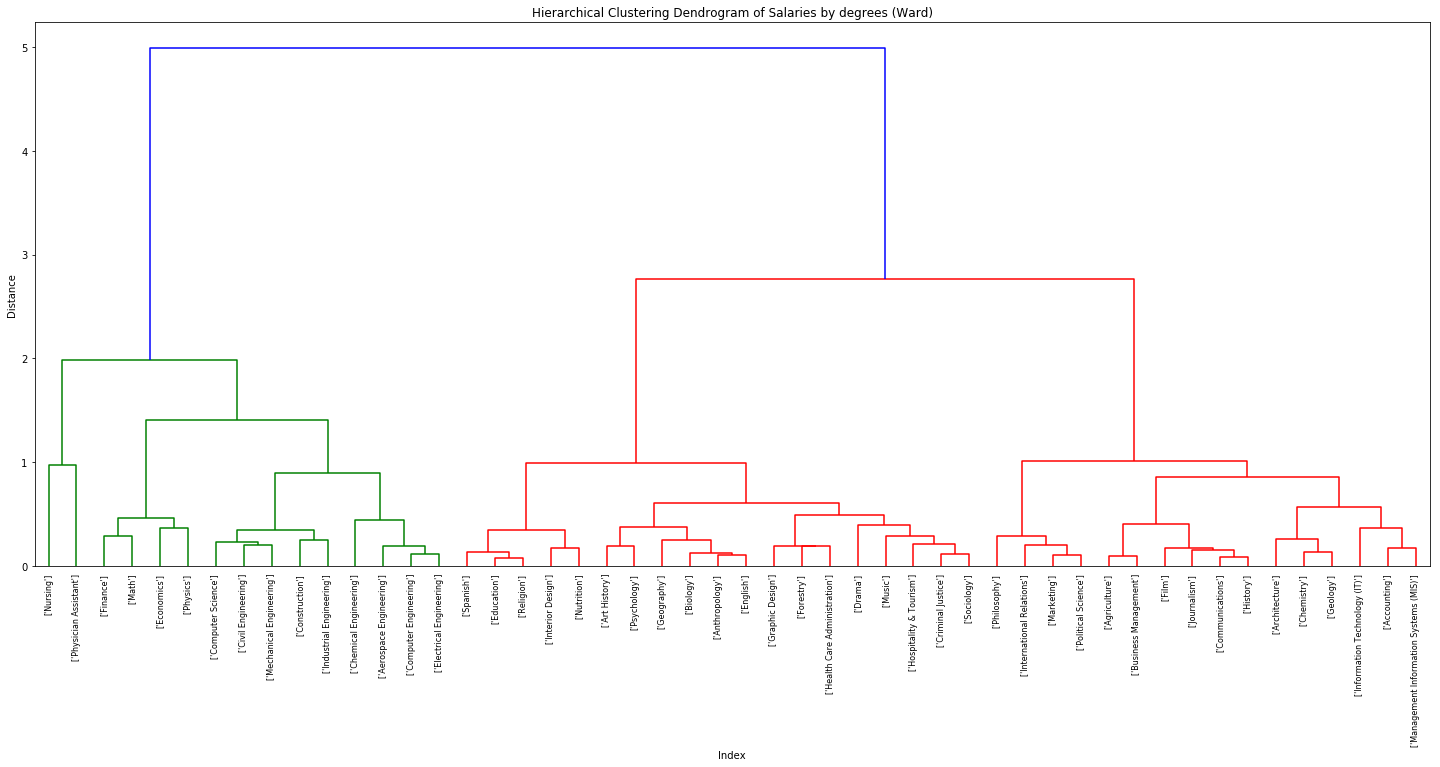

Time elapsed total: 0.8581480979919434


In [16]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram of Salaries by degrees (Ward)')
plt.xlabel('Index')
plt.ylabel('Distance')
d=hac.dendrogram(z,leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    labels = undergrad_major_array
)
plt.show()
print("Time elapsed total: "+str(time.time() - start_time))

In [17]:
print(len(z))
print(len(undergrad_major_array))
# new_z = np.column_stack((z, undergrad_major_array))

49
50


In [18]:
z1 = hac.linkage(deg_np, method='ward')
print(len(z1))

49


Time elapsed clustering: 0.0005013942718505859


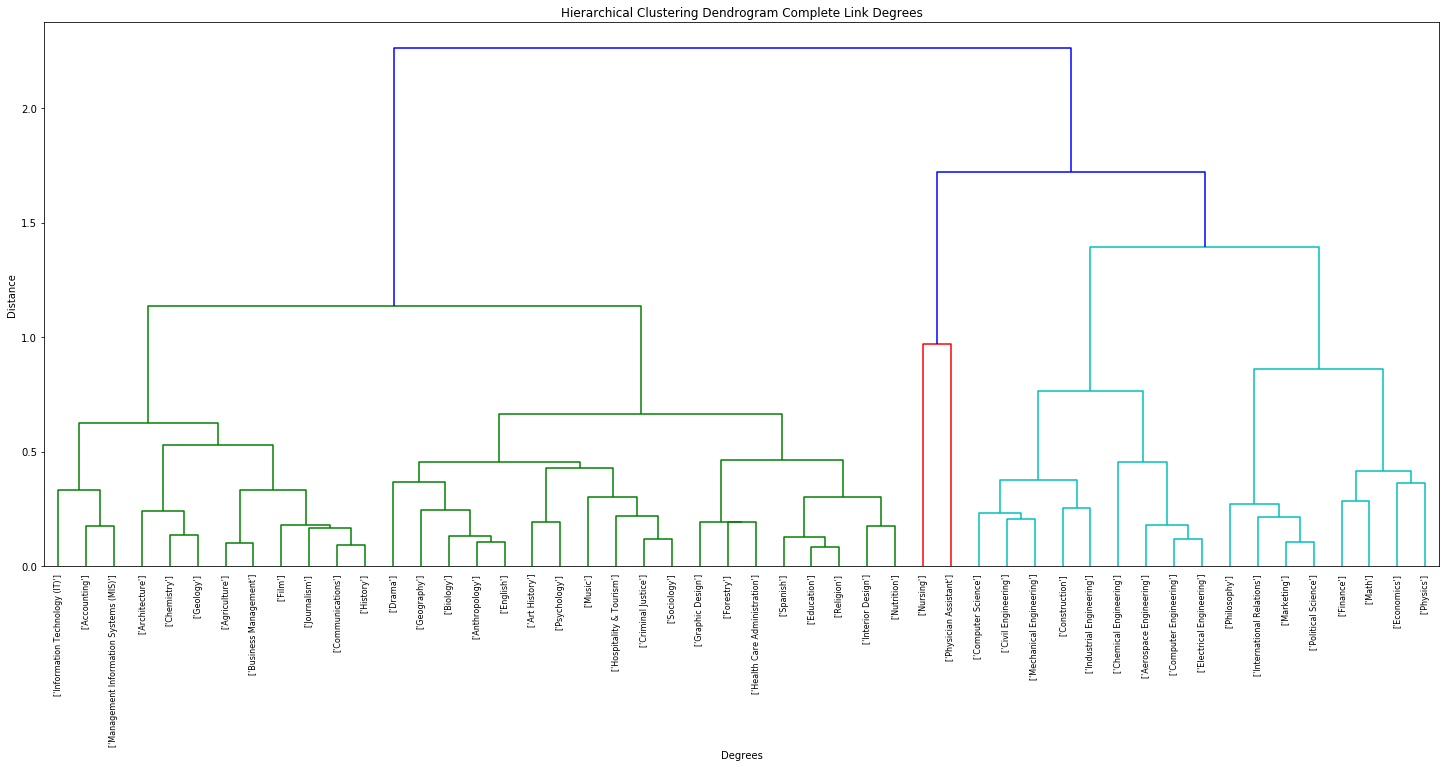

Time elapsed total: 0.5700163841247559


In [19]:
deg_np = df_norm.as_matrix()
start_time = time.time()
z_under1 = hac.linkage(deg_np, method='complete')
print("Time elapsed clustering: "+str(time.time() - start_time))
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram Complete Link Degrees')
plt.xlabel('Degrees')
plt.ylabel('Distance')
d=hac.dendrogram(z_under1,leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    labels = undergrad_major_array
)
plt.show()
print("Time elapsed total: "+str(time.time() - start_time))

Time elapsed clustering: 0.0018820762634277344


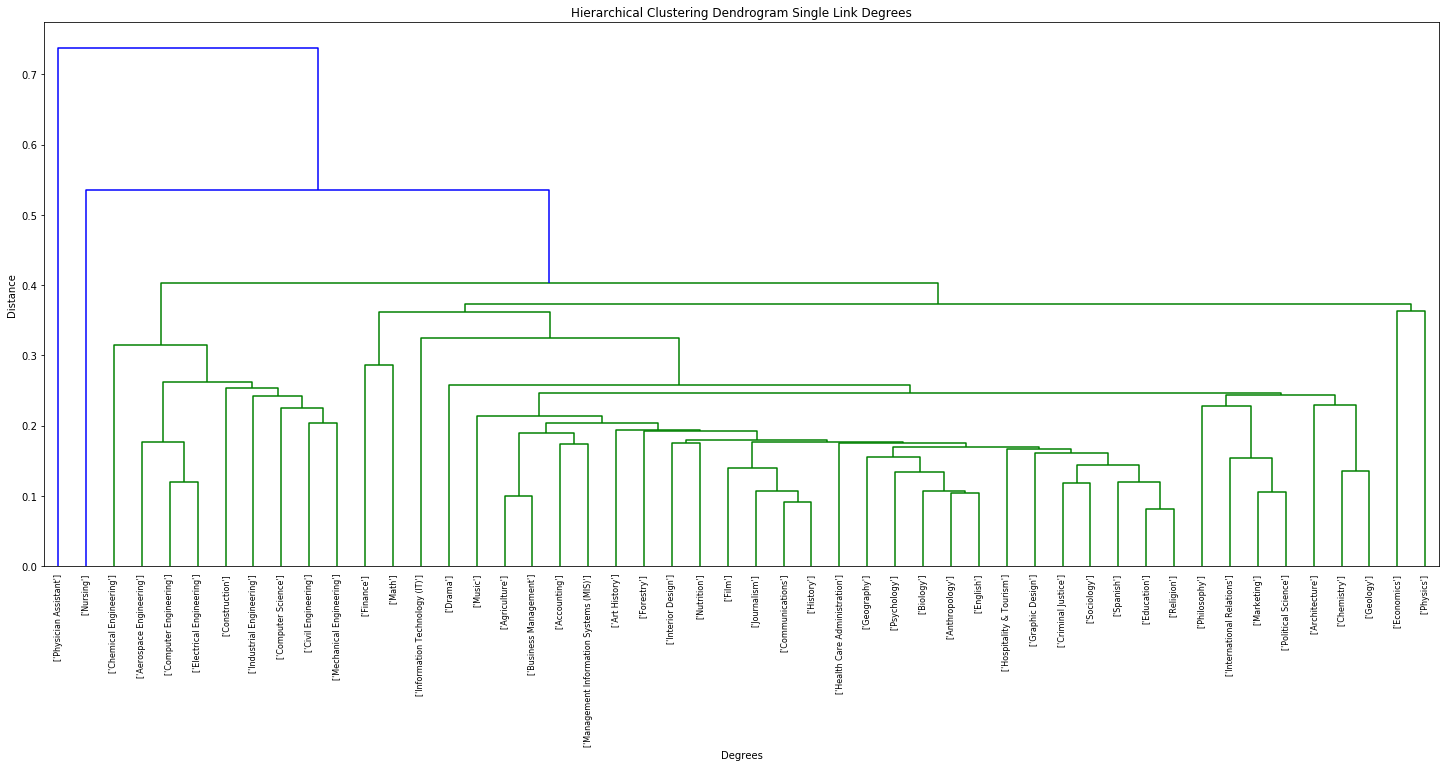

Time elapsed total: 0.693779706954956


In [20]:
deg_np = df_norm.as_matrix()
start_time = time.time()
z_under2 = hac.linkage(deg_np, method='single')
print("Time elapsed clustering: "+str(time.time() - start_time))
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram Single Link Degrees')
plt.xlabel('Degrees')
plt.ylabel('Distance')
d=hac.dendrogram(z_under2,leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    labels = undergrad_major_array
)
plt.show()
print("Time elapsed total: "+str(time.time() - start_time))

In [21]:
coltype_df = pd.read_csv('C:/JK/Masters Studies/Fall 2017/KDD/Clustering/Dataset/coltype_cleaned.csv')
col = coltype_df.drop("Unnamed: 0",axis=1)
col1 = col.drop("School.Type",axis=1)
deg_np=col1
df=pd.read_csv('C:/JK/Masters Studies/Fall 2017/KDD/Clustering/Dataset/coltype.csv')
school_name_df= pd.DataFrame(df['School.Name'])
# school_name_df= pd.DataFrame(df['School.Name'])
print(school_name_df.head())
print(school_name_df.shape)
school_name_array = school_name_df.as_matrix()
# school_name_array
school_type_df = pd.DataFrame(df['School.Type'])
print(school_type_df.head())
print(school_type_df.shape)
school_type_array = school_type_df.as_matrix()

                                    School.Name
0   Massachusetts Institute of Technology (MIT)
1      California Institute of Technology (CIT)
2                           Harvey Mudd College
3  Polytechnic University of New York, Brooklyn
4                                  Cooper Union
(269, 1)
   School.Type
0  Engineering
1  Engineering
2  Engineering
3  Engineering
4  Engineering
(269, 1)


In [22]:
z2 = hac.linkage(deg_np, method='single')
print(len(z2))

268


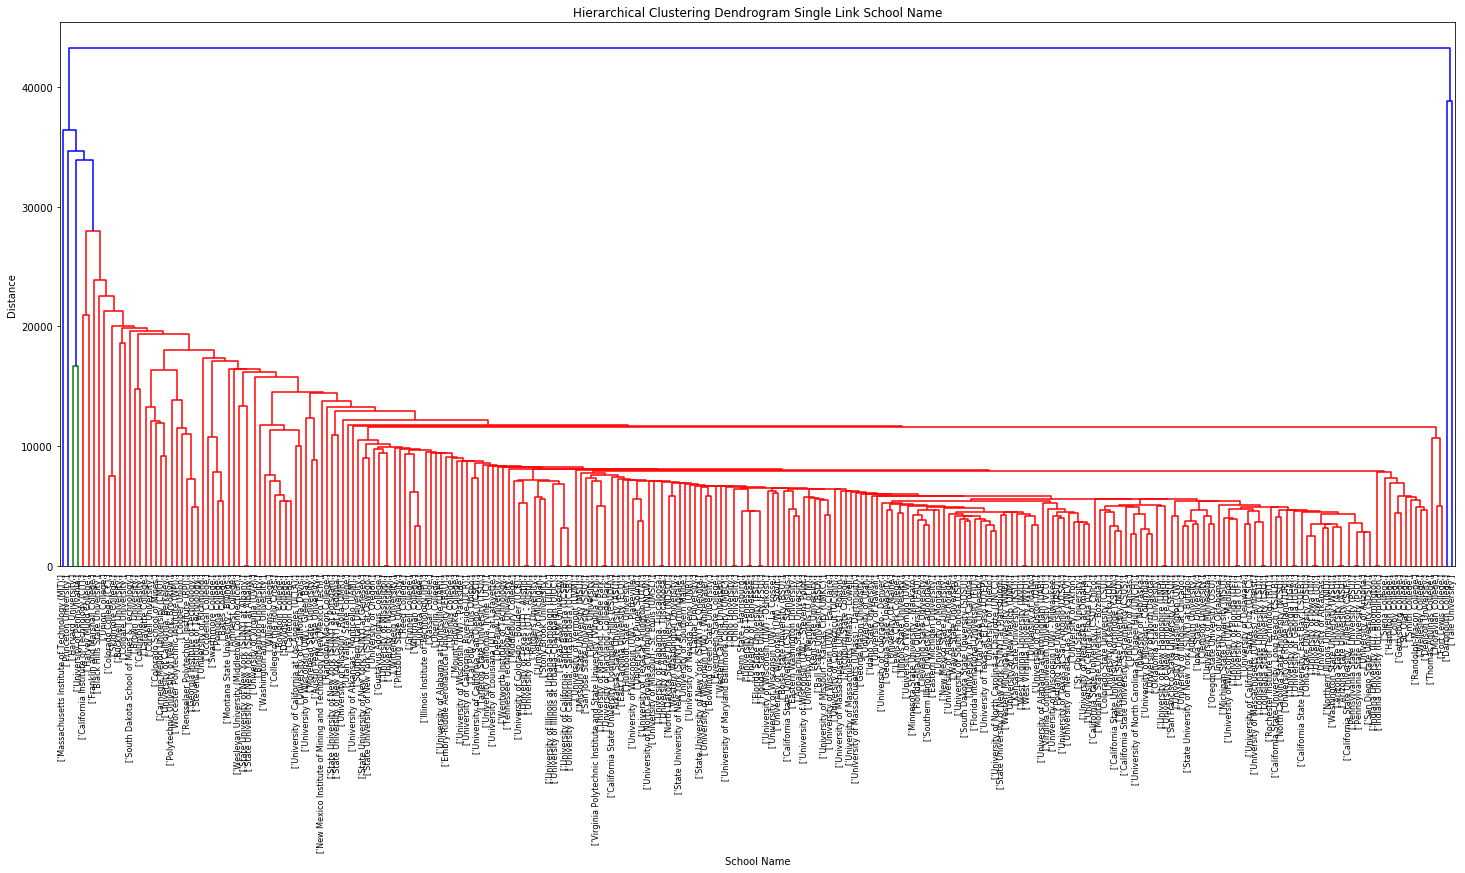

In [23]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram Single Link School Name')
plt.xlabel('School Name')
plt.ylabel('Distance')
d=hac.dendrogram(z2,leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    labels = school_name_array
)
plt.show()

Time elapsed clustering: 0.003007650375366211


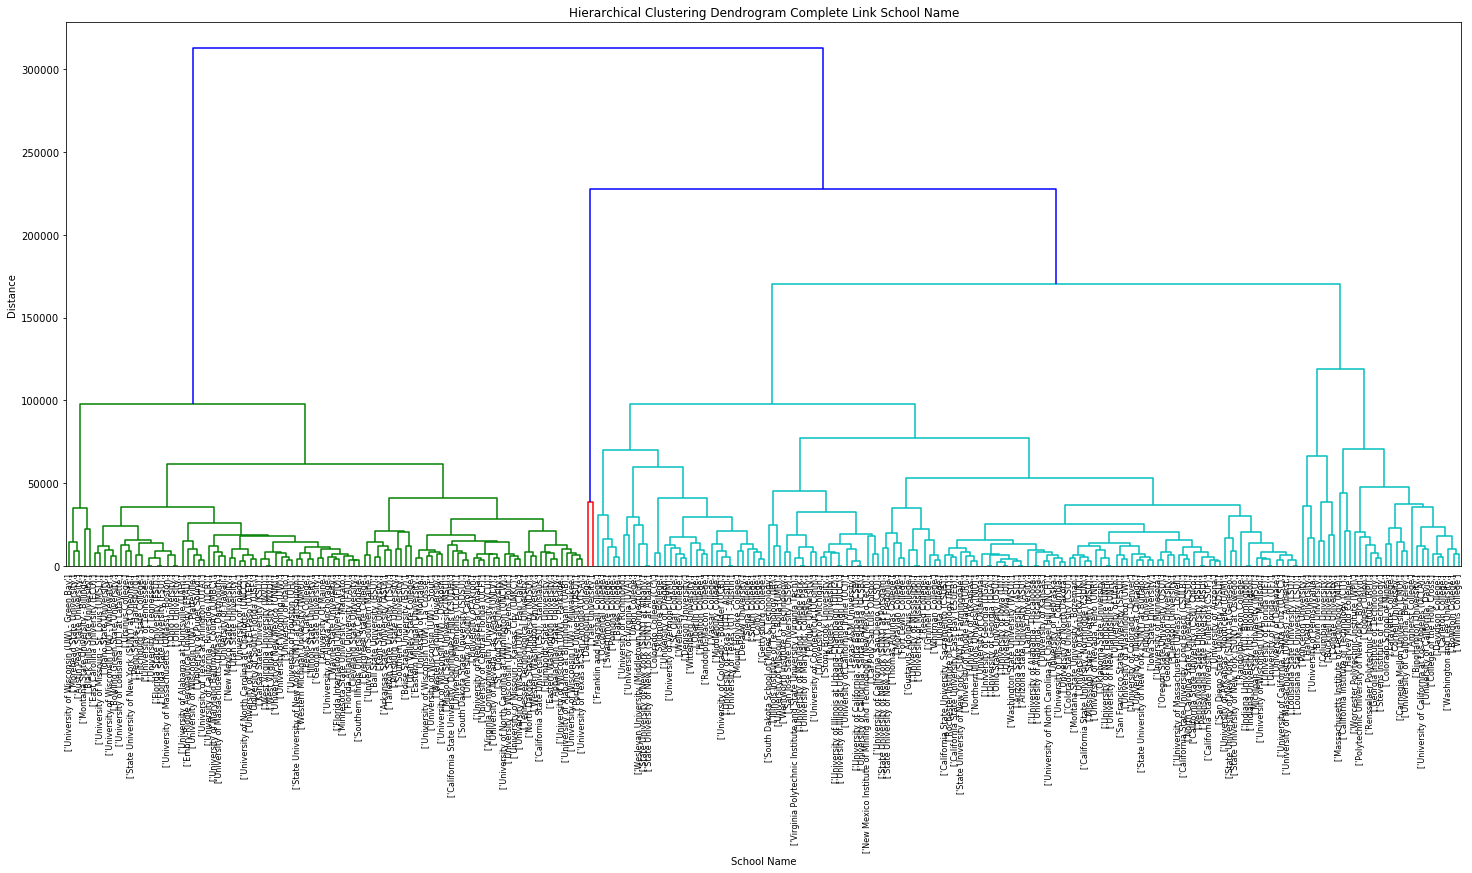

Time elapsed total: 3.1438887119293213


In [24]:

start_time = time.time()
z3 = hac.linkage(deg_np, method='complete')
print("Time elapsed clustering: "+str(time.time() - start_time))
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram Complete Link School Name')
plt.xlabel('School Name')
plt.ylabel('Distance')
d=hac.dendrogram(z3,leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    labels = school_name_array
)
plt.show()
print("Time elapsed total: "+str(time.time() - start_time))

Time elapsed clustering: 0.0055158138275146484


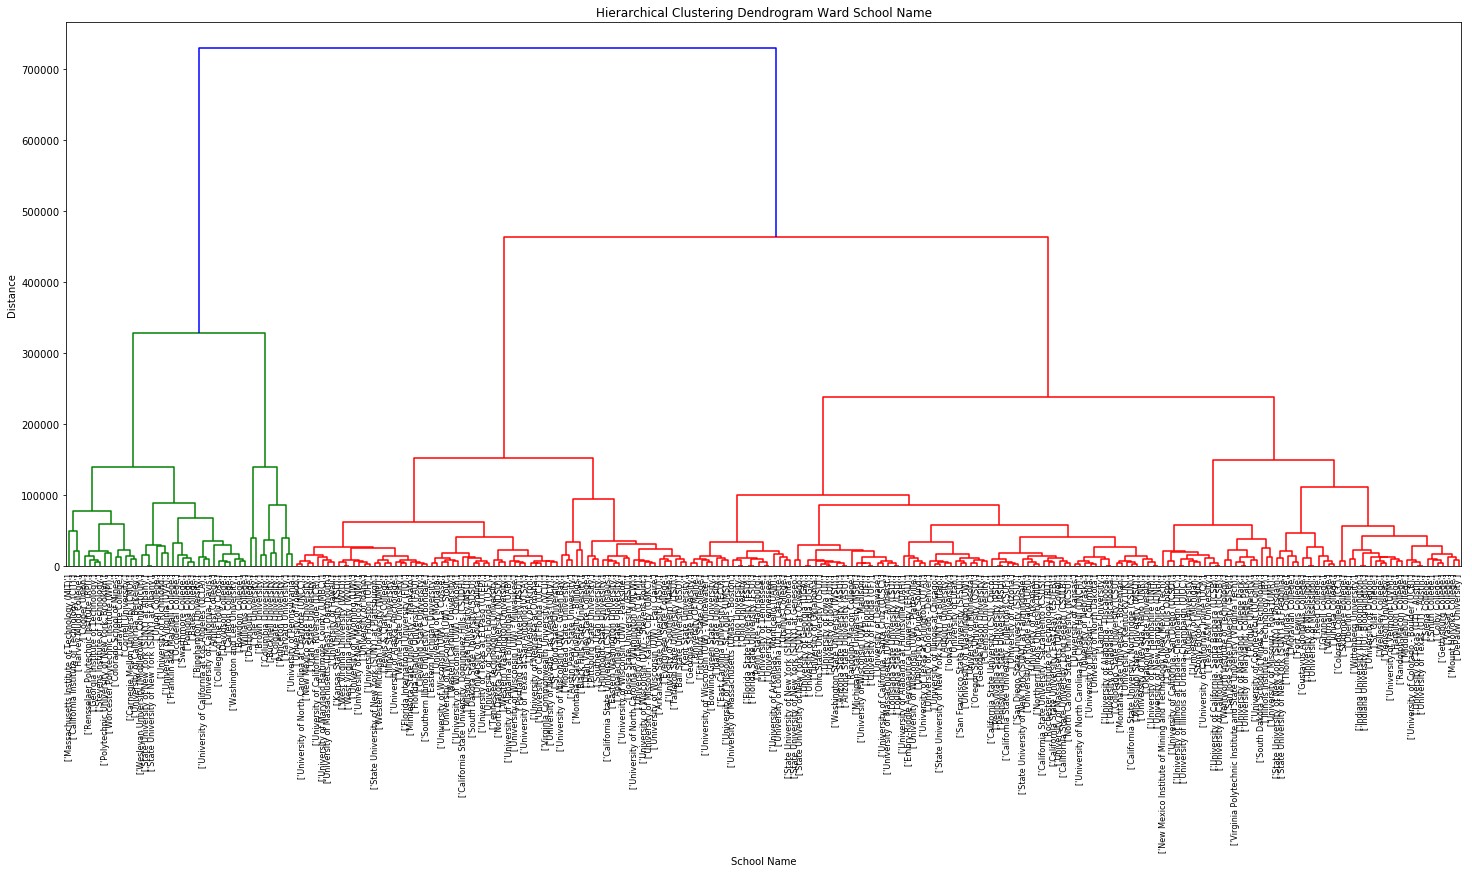

Time elapsed total: 3.16241455078125


In [25]:
start_time = time.time()
z3 = hac.linkage(deg_np, method='ward')
print("Time elapsed clustering: "+str(time.time() - start_time))
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram Ward School Name')
plt.xlabel('School Name')
plt.ylabel('Distance')
d=hac.dendrogram(z3,leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    labels = school_name_array
)
plt.show()
print("Time elapsed total: "+str(time.time() - start_time))

Time elapsed clustering: 0.0015034675598144531


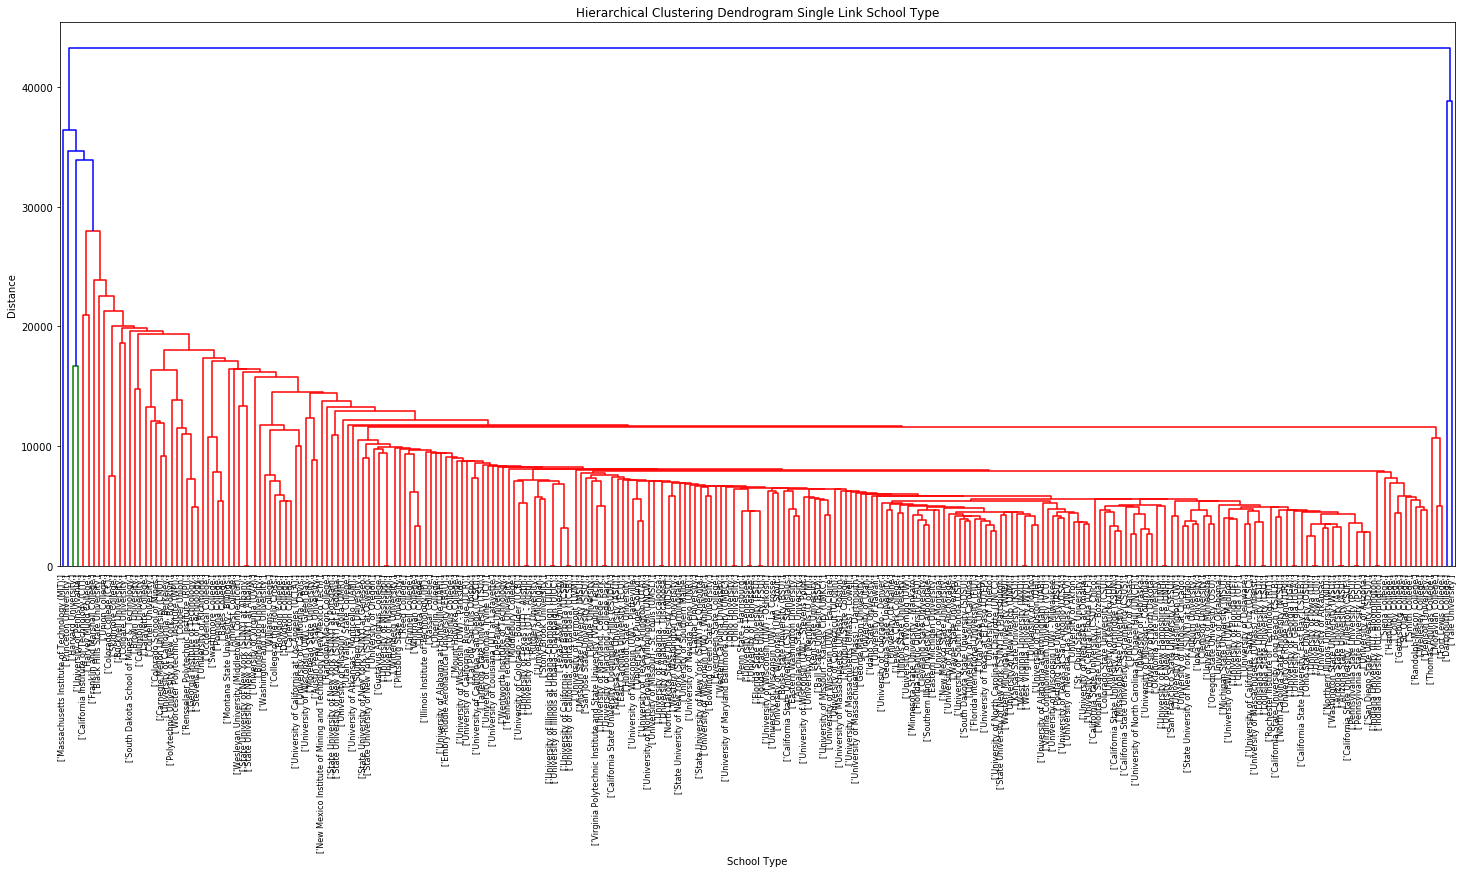

Time elapsed total: 2.6365067958831787


In [26]:
start_time = time.time()
z3 = hac.linkage(deg_np, method='single')
print("Time elapsed clustering: "+str(time.time() - start_time))
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram Single Link School Type')
plt.xlabel('School Type')
plt.ylabel('Distance')
d=hac.dendrogram(z3,leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    labels = school_name_array
)
plt.show()
print("Time elapsed total: "+str(time.time() - start_time))

Time elapsed clustering: 0.003509521484375


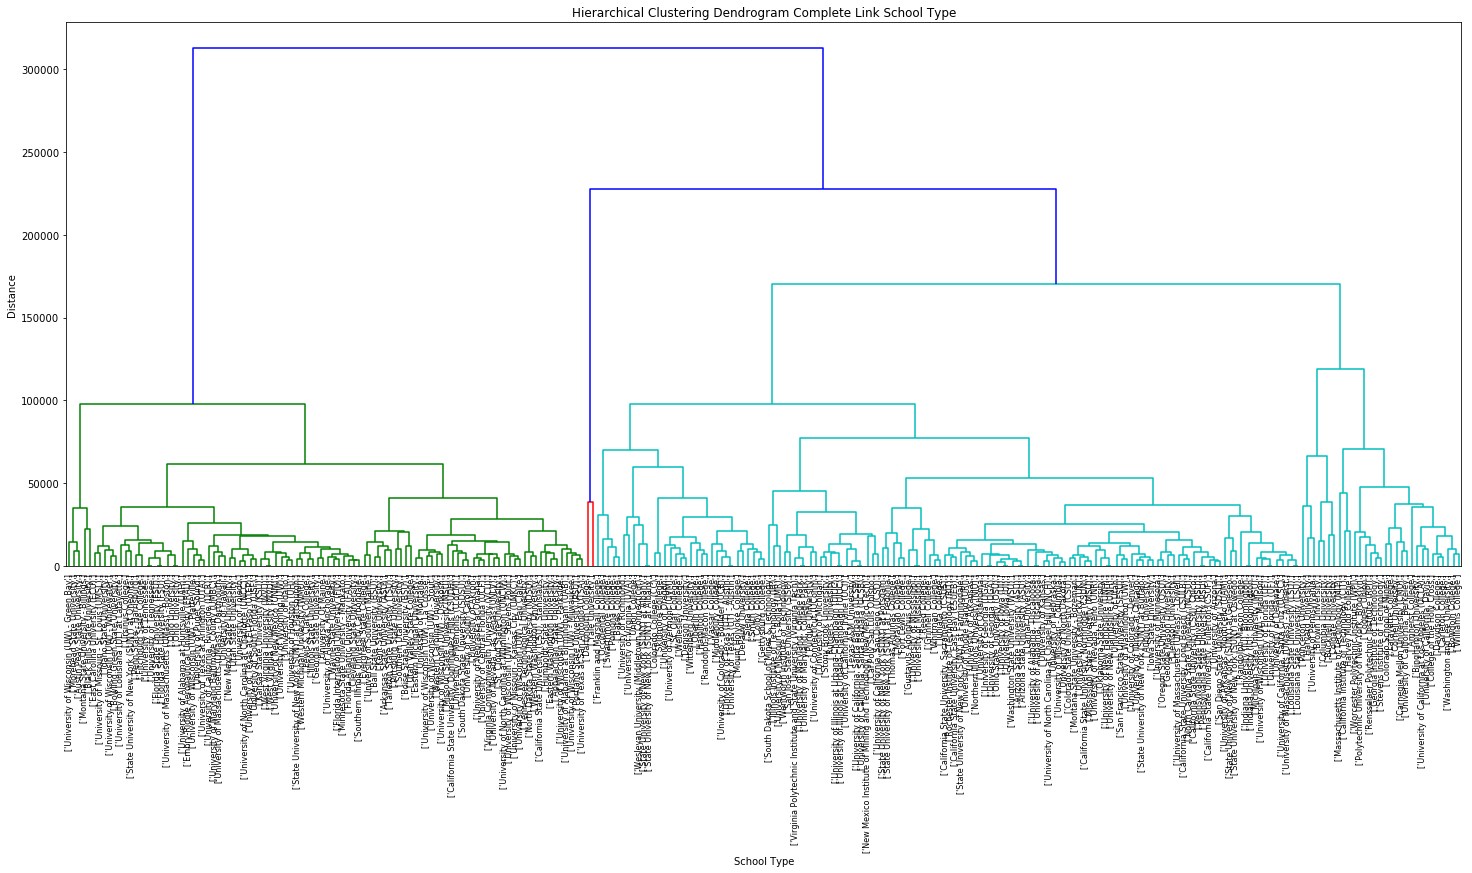

Time elapsed total: 2.811738967895508


In [27]:
start_time = time.time()
z3 = hac.linkage(deg_np, method='complete')
print("Time elapsed clustering: "+str(time.time() - start_time))
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram Complete Link School Type')
plt.xlabel('School Type')
plt.ylabel('Distance')
d=hac.dendrogram(z3,leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    labels = school_name_array
)
plt.show()
print("Time elapsed total: "+str(time.time() - start_time))

Time elapsed clustering: 0.004511356353759766


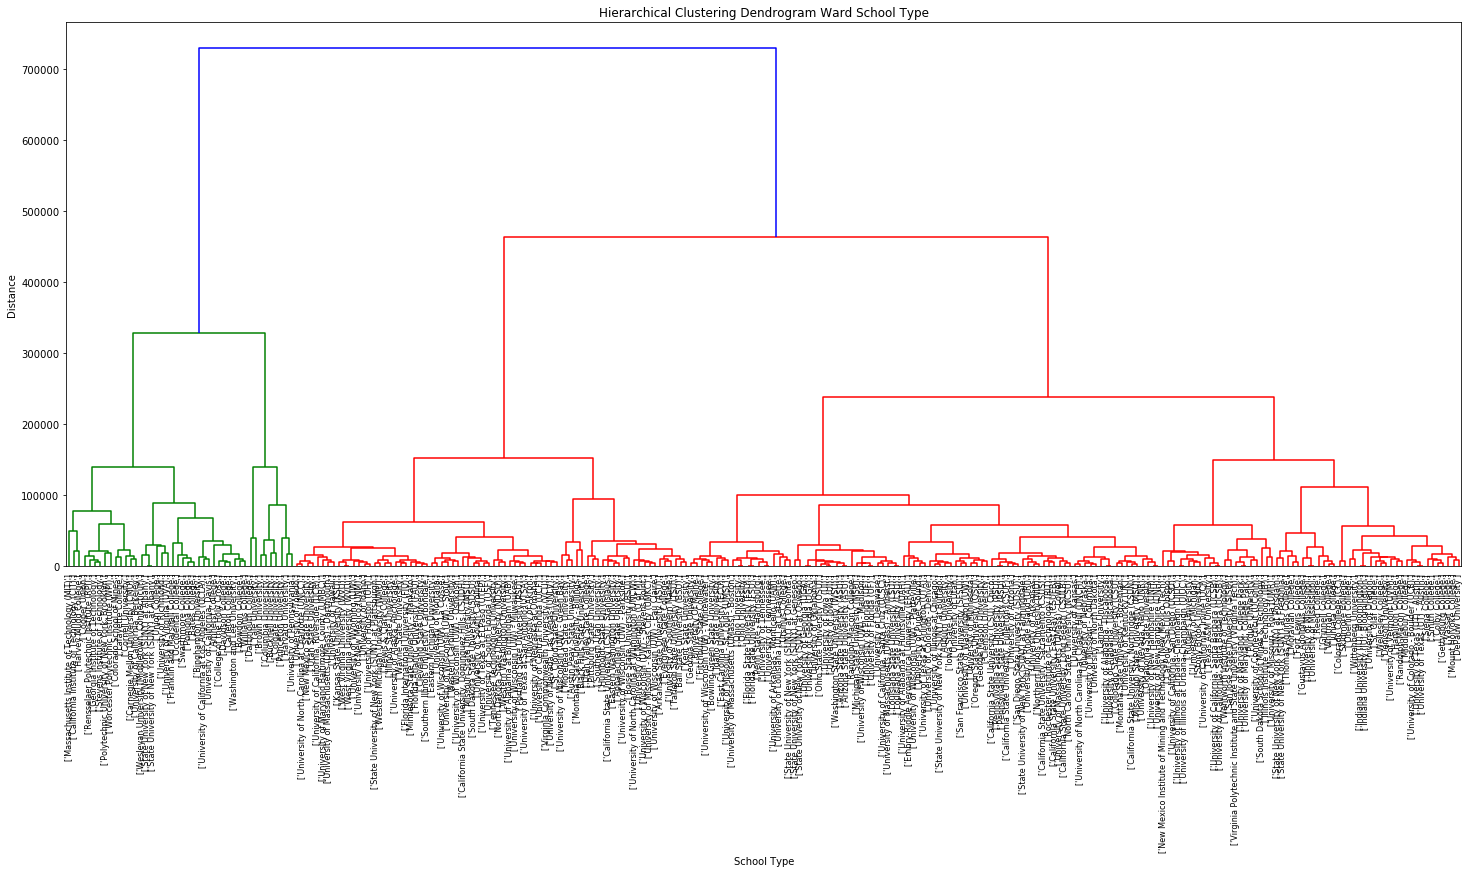

Time elapsed total: 3.030207872390747


In [28]:
start_time = time.time()
z3 = hac.linkage(deg_np, method='ward')
print("Time elapsed clustering: "+str(time.time() - start_time))
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram Ward School Type')
plt.xlabel('School Type')
plt.ylabel('Distance')
d=hac.dendrogram(z3,leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    labels = school_name_array
)
plt.show()
print("Time elapsed total: "+str(time.time() - start_time))

In [31]:
tree=hac.to_tree(z3)
print(tree)

In [34]:
leaves = hac.leaves_list(z3)
print(leaves)

[  0   1   2   4   7   8  10   3   5   9  42  91   6  94  52  23 112  54
  55  95  59  45  47  51  53 104  97  99  41  44  48  49  46  43  50  86
  88  92  93  39  40  87  89  90 197 206 174 180 163 187 190 196 178  35
 186 179 160 156 172 194 208  82 212 215 195 198 201 232 213 218 222 224
 243 246 250 251 220 242 209 226 219 233  18 188 200 239 203 234 236 237
 217 225 245 227 228 262 263 264 267 268 248 265 266 231 230 235 244 229
 241 256 240 257 253 254 259  85 258 261 255 260 207 221 216 199 223 210
 247 249 185  37 211  38 214 205  36 202 204 193  76 192 164 189  26 127
 151 146  30 145 134  28 142  31 130 119  24 118 137 143 116  25 120 154
  17 181  71 167 138 157 158 133 136 149 124 129 141 148 122 126 117  27
 128 121 125 132 140 131 152 168 155  16 139 123 135 147 159 161 166 165
 170 175  32 162 177 191 183 171 176 150 169  34 184  15  96  98  19 102
 113 110 111 101 103  21 108  12 106  13  20 107 114 115  14  11 105 238
 252  84  81  83  74  33 173  73  79  75  77  72  8

In [35]:
school_type_df= pd.DataFrame(coltype_df['School.Type'])
print(school_type_df.head())
print(school_type_df.shape)

   School.Type
0  Engineering
1  Engineering
2  Engineering
3  Engineering
4  Engineering
(269, 1)


In [36]:
k3_labels_df_name = pd.DataFrame(leaves)
print(k3_labels_df_name.head())
k3_labels_df_name['School Type'] = school_type_df.iloc[:,0].values
print(k3_labels_df_name.head())


   0
0  0
1  1
2  2
3  4
4  7
   0  School Type
0  0  Engineering
1  1  Engineering
2  2  Engineering
3  4  Engineering
4  7  Engineering


In [37]:
cluster3_withpercentname = k3_labels_df_name
print(cluster3_withpercentname.head())
cluster3_withpercentname=cluster3_withpercentname.rename(columns={0:'Label'})
print(cluster3_withpercentname.head())
cluster3_withpercentname['columns'] = cluster3_withpercentname.groupby('Label')['School Type'].cumcount()
cluster3_withpercentname.head()
result3_name = cluster3_withpercentname.pivot(index='Label', columns='columns')
result3_name

   0  School Type
0  0  Engineering
1  1  Engineering
2  2  Engineering
3  4  Engineering
4  7  Engineering
   Label  School Type
0      0  Engineering
1      1  Engineering
2      2  Engineering
3      4  Engineering
4      7  Engineering


,School Type
columns,0
Label,
0,Engineering
1,Engineering
2,Engineering
3,Engineering
4,Engineering
5,Engineering
6,Engineering
7,Engineering


In [40]:
print(z3)

[[  2.20000000e+01   1.09000000e+02   0.00000000e+00   2.00000000e+00]
 [  1.90000000e+01   1.02000000e+02   0.00000000e+00   2.00000000e+00]
 [  2.30000000e+01   1.12000000e+02   0.00000000e+00   2.00000000e+00]
 ..., 
 [  5.29000000e+02   5.30000000e+02   3.27998810e+05   4.40000000e+01]
 [  5.32000000e+02   5.33000000e+02   4.64141711e+05   2.25000000e+02]
 [  5.34000000e+02   5.35000000e+02   7.29625716e+05   2.69000000e+02]]


In [44]:
dist_matrix = pdist(deg_np,'euclidean')

In [45]:
print(dist_matrix)

[ 43291.80060935  44188.79948584  43463.20282722 ...,  21708.29334609
  37216.5285861   22552.60517102]


In [48]:
linkageMatrix = hac.linkage(dist_matrix)

In [49]:
print(linkageMatrix)

[[  2.10000000e+01   1.08000000e+02   0.00000000e+00   2.00000000e+00]
 [  1.90000000e+01   1.02000000e+02   0.00000000e+00   2.00000000e+00]
 [  2.20000000e+01   1.09000000e+02   0.00000000e+00   2.00000000e+00]
 ..., 
 [  0.00000000e+00   5.33000000e+02   3.64035713e+04   2.67000000e+02]
 [  8.60000000e+01   8.80000000e+01   3.87863378e+04   2.00000000e+00]
 [  5.34000000e+02   5.35000000e+02   4.32329735e+04   2.69000000e+02]]


In [50]:
heatmapOrder = hac.leaves_list(linkageMatrix)

In [51]:
print(heatmapOrder)

[  0  87  89  90   1   2  59 268  54  72  80  39  40  14  92  93  42  91
   9   6  94   3   5   4   7   8  10  55  45  47  51  53 267  41  52  23
 112  95 104  46  50  44  43  48  49  97  99 262 263 264  15  31 238 252
 105 248 204 266 164 189 182  74  33 173  78 265  73  79  75  77  11  56
  70 154  17  76  58 229 163  96  98 261 101 193  60  12  18  57 100  22
 109 113 110 111  19 102 103  21 108 153 242 106 114  13  20 107 220 259
 247 231 181  71 167 256 249  32 162 188 200 140 258 150 175 192 199 223
  85 250 187  37 211 205  36 202  38 214 251 243 246 241 230 235 244 257
 240 260 255 253 254 115 185 216 123 190 122 149 210 196 138 207 221  82
 212 179 201 232 213 218 222 224 174 215 195 233 209 226 198 180 219 197
 206 194 208 160 178  35 186 156 172 239 245 203 234 236 227 237 228 217
 225 117 191 177 183 171 176 155 159 161 166 165 170 169  34 184 124 129
 157 158 133 136 126 141 148 151 130 119  24 118 137 143 116  25 120  16
 135 147 131  26 127 139 146  30 145 152 168 134  2